<a href="https://colab.research.google.com/github/HARSHA0232/EDA-DIGTAL-ASSIGNMENT---1-/blob/main/Module_6_Dimensionality%20Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 6 : Dimensionality Reduction
Bajjuri Harsha vardhan 21BDS0232


In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np



# Load your dataset
file_path = '/content/student-mat.csv'
data = pd.read_csv(file_path)

# Inspect data columns
print(data.columns)

# Selecting numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int']).columns
print("Numeric columns:", numeric_cols)

# Scaling the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_cols])

data = pd.read_csv(file_path)

# Inspect data columns
print(data.columns)

# Selecting numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int']).columns
print("Numeric columns:", numeric_cols)

# Scaling the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_cols])


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
Numeric columns: Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
Numeric columns: Ind

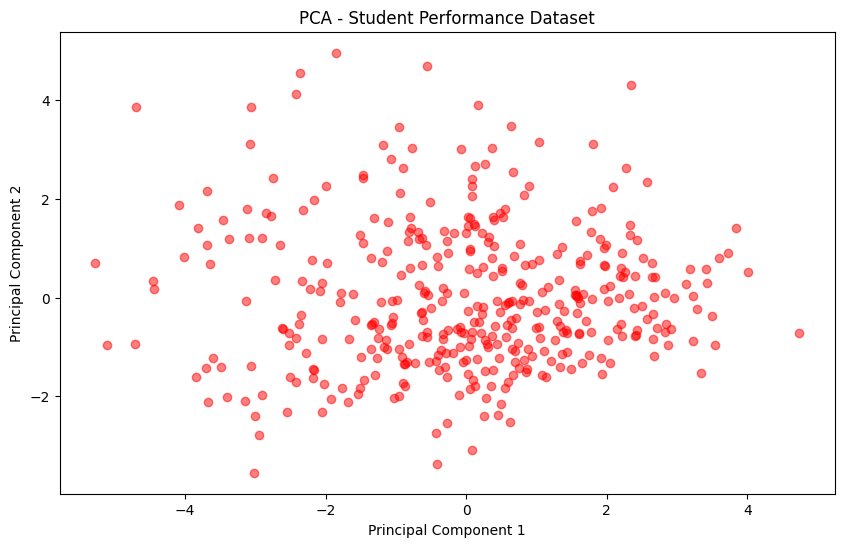

In [35]:
from sklearn.decomposition import PCA
# Apply PCA on the scaled data
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='red', alpha=0.5)
plt.title("PCA - Student Performance Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

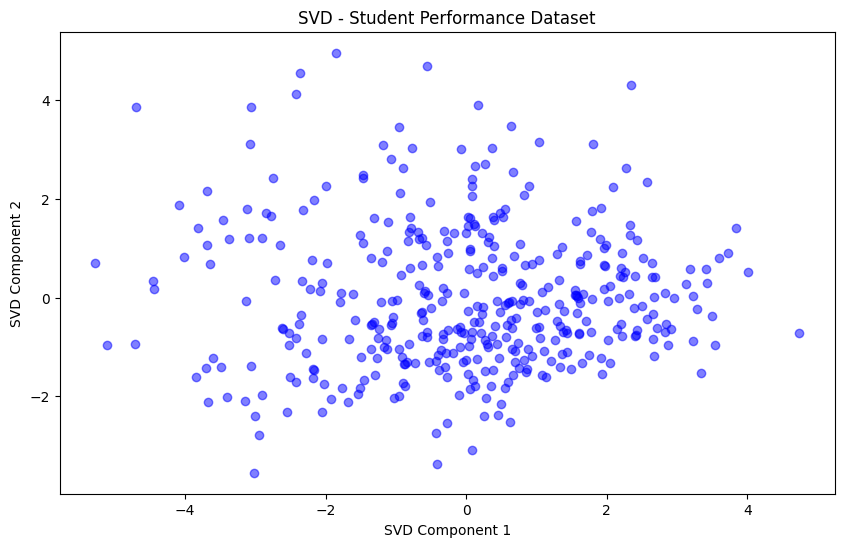

In [39]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Apply SVD on the scaled data
svd = TruncatedSVD(n_components=2)
svd_data = svd.fit_transform(scaled_data)

# Plot the SVD results
plt.figure(figsize=(10, 6))
plt.scatter(svd_data[:, 0], svd_data[:, 1], c='blue', alpha=0.5)
plt.title("SVD - Student Performance Dataset")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.show()


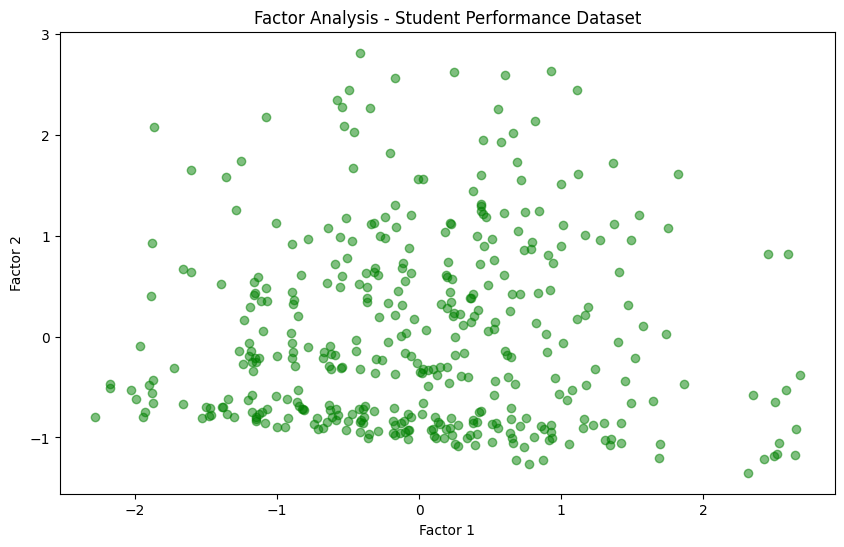

In [50]:
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt

# Apply Factor Analysis on the scaled data
fa = FactorAnalysis(n_components=2, random_state=42)
fa_data = fa.fit_transform(scaled_data)

# Plot the Factor Analysis results
plt.figure(figsize=(10, 6))
plt.scatter(fa_data[:, 0], fa_data[:, 1], c='green', alpha=0.5)
plt.title("Factor Analysis - Student Performance Dataset")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.show()


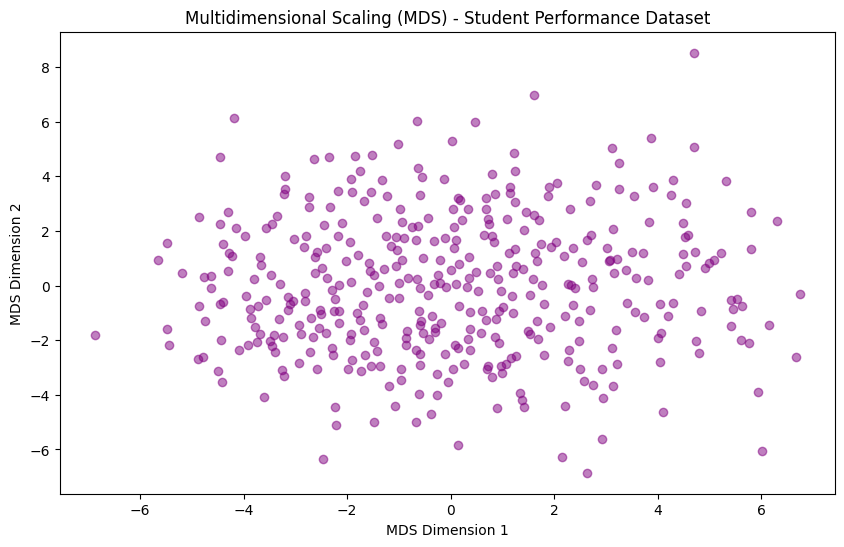

In [46]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Apply Multidimensional Scaling (MDS) on the scaled data
mds = MDS(n_components=2, random_state=42, n_init=1, max_iter=100)
mds_data = mds.fit_transform(scaled_data)

# Plot the MDS results
plt.figure(figsize=(10, 6))
plt.scatter(mds_data[:, 0], mds_data[:, 1], c='purple', alpha=0.5)
plt.title("Multidimensional Scaling (MDS) - Student Performance Dataset")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.show()


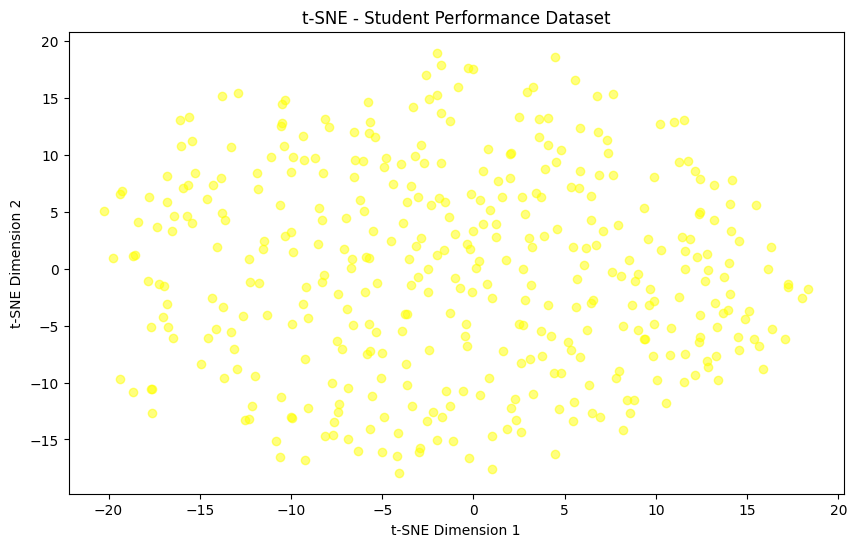

In [52]:
from sklearn.manifold import TSNE
# Apply t-SNE on the scaled data
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c='yellow', alpha=0.5)
plt.title("t-SNE - Student Performance Dataset")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


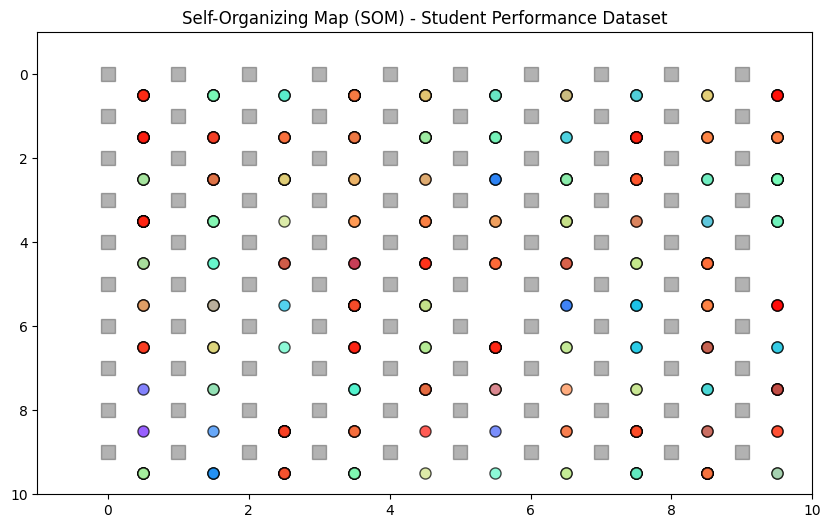

In [57]:
from minisom import MiniSom
# Initialize the Self-Organizing Map (SOM)
som = MiniSom(x=10, y=10, input_len=scaled_data.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(scaled_data)
som.train_random(scaled_data, 100)

# Plotting the SOM
plt.figure(figsize=(10, 6))

# Background grid for SOM
for i in range(10):
    for j in range(10):
        plt.scatter(i, j, s=100, c='black', alpha=0.3, marker='s')

# Plot each data point in the SOM space
for i, x in enumerate(scaled_data):
    w = som.winner(x)
    plt.plot(
        w[0] + 0.5, w[1] + 0.5, 'o',
        markerfacecolor=plt.cm.rainbow(i / len(scaled_data)),
        markeredgecolor='k', markersize=8, alpha=0.7
    )

plt.title("Self-Organizing Map (SOM) - Student Performance Dataset")
plt.xlim([-1, 10])
plt.ylim([-1, 10])
plt.gca().invert_yaxis()
plt.show()
